In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import subprocess
import os

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters
from MopsResults import MopsResults

% matplotlib inline

In [2]:
dataDrive = "/Users/joachim/"
dataLocation = "neosimData/jpl/oc28-30EditedSSMIDs.txt"
subsampleLocation = "neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/"
runLocation = dataDrive + subsampleLocation

In [3]:
dets_df = MopsReader.readDetectionsIntoDataframe(dataDrive + dataLocation)
dets_df

,visitId,objectId,ra,dec,mjd,mag,snr
diaId,,,,,,,
0,1632978,0,176.493376,-11.783686,52390.965381,20.1233,14.68430
1,1632981,1,173.720592,-4.184379,52390.967172,20.0718,15.08580
2,1632982,2,174.183623,-2.062412,52390.967618,18.0567,100.80400
3,1632982,3,174.496816,-3.012748,52390.967618,20.0325,15.71120
4,1632982,1,173.721745,-4.183480,52390.967618,20.0708,15.08180
5,1632983,4,168.551646,-14.376801,52390.969452,19.6707,26.04840
6,1632988,1,173.733460,-4.174343,52390.972152,20.0851,15.15950
7,1632991,5,180.172511,-14.736185,52390.973526,18.8048,54.38470
8,1632996,6,184.203462,-24.600833,52390.976214,21.2715,5.01000


In [12]:
parameters = MopsParameters.fromYaml(runLocation + "parameters.yaml")
tracker = MopsTracker.fromYaml(runLocation + "tracker.yaml")

Loading parameters from /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/parameters.yaml
Loading tracker from /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/tracker.yaml


In [13]:
results = MopsResults.fromYaml(runLocation + "results.yaml")

Loading results from /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results.yaml


In [14]:
import MopsDatabase
import MopsPlotter

In [16]:
con = sql.connect(tracker.mainDatabase)
window_dbs = MopsDatabase.attachDatabases(con, tracker.windowDatabases)

Proceeding with the first 10 databases...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52391-52406.db to con as db0...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52392-52406.db to con as db1...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52393-52408.db to con as db2...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52394-52408.db to con as db3...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52395-52410.db to con as db4...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52396-52411.db to con as db5...
Attaching /Users/joachim/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/523

In [17]:
results.performanceRatio

{'52391-52406': 0.9496805111821086,
 '52392-52406': 0.9564867042707494,
 '52393-52408': 0.9555884529977794,
 '52394-52408': 0.9541284403669725,
 '52395-52410': 0.9707317073170731,
 '52396-52411': 0.9698391420911529,
 '52397-52412': 0.9708806818181818,
 '52398-52413': 0.9725519287833828,
 '52399-52413': 0.9717607973421927,
 '52400-52415': 0.9663716814159292,
 '52401-52416': 0.967420814479638,
 '52402-52417': 0.9669499527856469,
 '52403-52418': 0.9575070821529745,
 '52404-52419': 0.9458874458874459,
 '52405-52420': 0.9346991037131882,
 '52406-52420': 0.9383116883116883,
 '52408-52423': 0.8884381338742393,
 '52410-52425': 0.8472803347280334,
 '52411-52426': 0.8242280285035629,
 '52412-52427': 0.8518518518518519,
 '52413-52428': 0.8543689320388349,
 '52415-52430': 0.8792822185970636,
 '52416-52431': 0.8828382838283828,
 '52417-52432': 0.8744939271255061,
 '52418-52433': 0.8423529411764706,
 '52419-52434': 0.8483412322274881,
 '52420-52435': 0.8868243243243243,
 '52422-52437': 0.92984542211

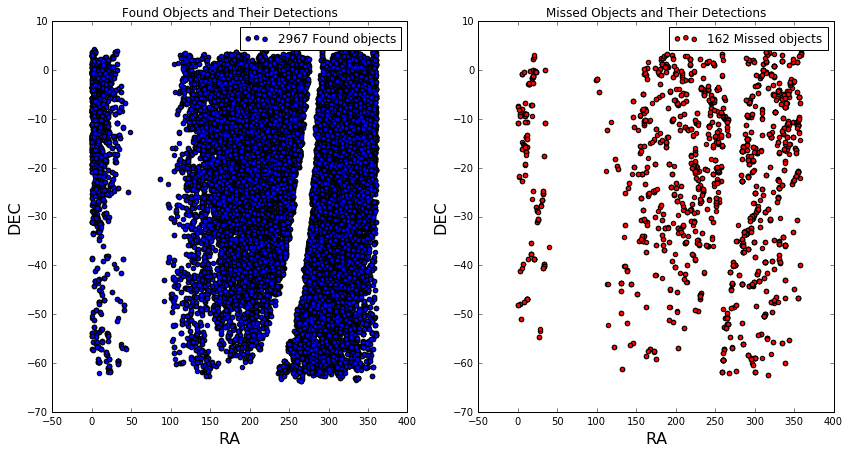

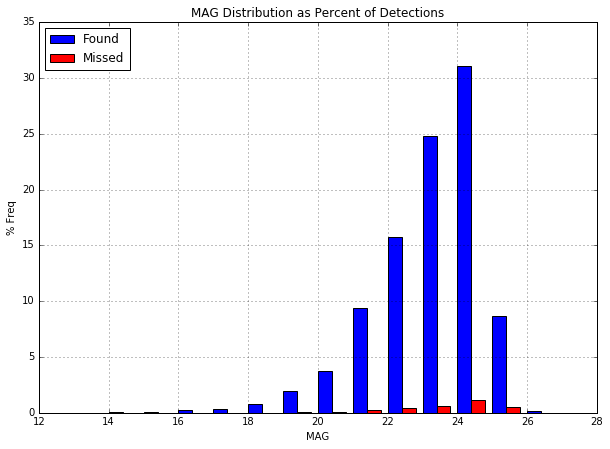

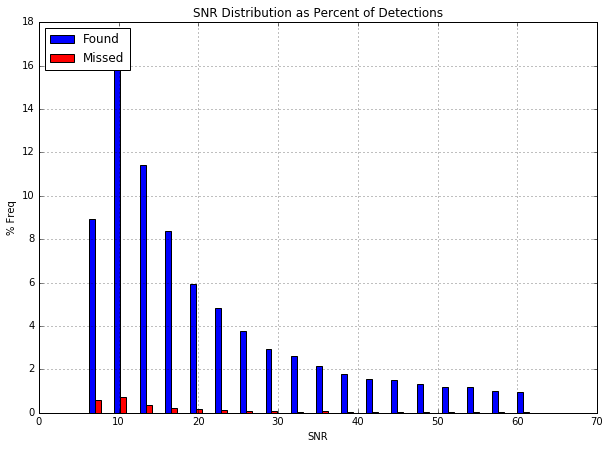

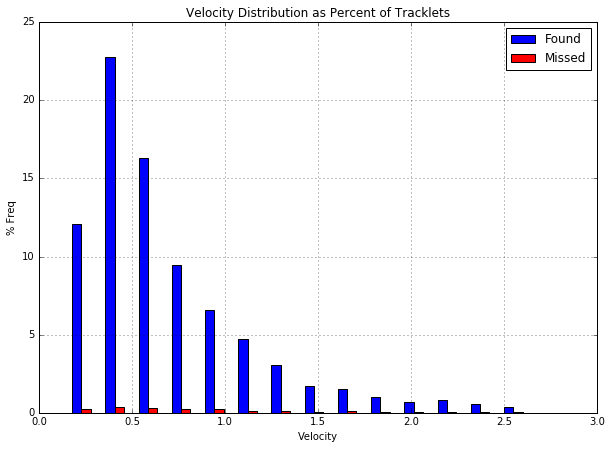

In [18]:
MopsPlotter.plotHists(con)

In [19]:
MopsDatabase.results(con)

Completion:         0.965191932336
Found Objects:      2967
Findable Objects:   3074
Missed Objects:     162
Linkage Efficiency: 0.102638471669
True Tracks:        90168
False Tracks:       788333
Total Tracks:       878501


In [52]:
missed_objects_lsst = MopsDatabase.findMissedObjects(con)["objectId"].values

In [53]:
missed_objects_jpl_orig = np.loadtxt("lost.txt", dtype=str)

In [54]:
convert_jpl, convert_lsst = np.loadtxt("/Users/joachim/neosimData/jpl/smId_to_int.dat", dtype=str, unpack=True)

In [55]:
missed_objects_jpl = convert_lsst[np.in1d(convert_jpl, missed_objects_jpl_orig)]

In [65]:
shared_missed_objects = np.intersect1d(missed_objects_jpl, missed_objects_lsst)
shared_missed_objects.astype(int)

array([170, 237, 412,  77])

In [82]:
shared_missed_objects

array(['170', '237', '412', '77'], 
      dtype='|S21')

In [84]:
len(missed_objects_jpl), len(missed_objects_lsst), len(shared_missed_objects)

(44, 162, 4)

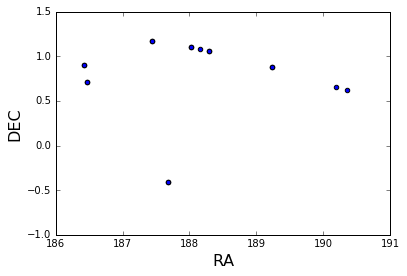

In [71]:
MopsPlotter.plotObject(con, 170)

In [72]:
MopsDatabase.findObjectDetections(con, 170)

,diaId,visitId,objectId,ra,dec,mjd,mag,snr
0,380,1634081,170,190.351795,0.616306,52392.199088,21.9964,5.01000
1,707,1634670,170,190.185123,0.658260,52393.042963,22.0096,5.41603
2,6921,1638602,170,189.236578,0.879128,52398.164919,22.0869,42.91500
3,7024,1638641,170,189.233178,0.879839,52398.184007,22.0856,38.46610
4,16697,1642934,170,188.291732,1.061066,52404.150724,23.0477,44.05430
5,16893,1642988,170,188.288064,1.061646,52404.175629,23.0464,40.20390
6,19863,1643876,170,188.149919,1.083580,52405.165702,22.4101,48.05390
7,21970,1644564,170,188.026952,1.101844,52406.083376,22.4197,33.99440
8,22135,1644612,170,188.023472,1.102320,52406.108695,22.4201,33.37930
9,28276,1647266,170,187.440398,1.166071,52411.034500,22.3153,25.86860


In [75]:
df = MopsDatabase.findObjectTracklets(con, 170)

In [80]:
max(df["night"].values) - min(df["night"].values)

56.0

In [81]:
df

,trackletId,linkedObjectId,numLinkedObjects,numMembers,velocity,rms,night,createdBy,deletedBy,diaId,visitId,objectId,ra,dec,mjd,mag,snr
0,6645,170,1,2,0.181970,1.403342e-14,52398.0,1,0,6921,1638602,170,189.236578,0.879128,52398.164919,22.0869,42.91500
1,6645,170,1,2,0.181970,1.403342e-14,52398.0,1,0,7024,1638641,170,189.233178,0.879839,52398.184007,22.0856,38.46610
2,16205,170,1,2,0.149060,1.403342e-14,52404.0,1,0,16697,1642934,170,188.291732,1.061066,52404.150724,23.0477,44.05430
3,16205,170,1,2,0.149060,1.403342e-14,52404.0,1,0,16893,1642988,170,188.288064,1.061646,52404.175629,23.0464,40.20390
4,16206,-1,2,2,5.883953,2.450908e-14,52404.0,1,0,16698,1642934,2056,188.143291,1.038806,52404.150724,25.0758,5.19582
5,16206,-1,2,2,5.883953,2.450908e-14,52404.0,1,0,16893,1642988,170,188.288064,1.061646,52404.175629,23.0464,40.20390
6,18221,-1,2,2,4.580859,6.566563e-14,52405.0,1,0,19665,1643836,2056,188.200348,1.001935,52405.144754,24.4694,5.99417
7,18221,-1,2,2,4.580859,6.566563e-14,52405.0,1,0,19863,1643876,170,188.149919,1.083580,52405.165702,22.4101,48.05390
8,20155,170,1,2,0.138717,2.450886e-14,52406.0,1,0,21970,1644564,170,188.026952,1.101844,52406.083376,22.4197,33.99440
9,20155,170,1,2,0.138717,2.450886e-14,52406.0,1,0,22135,1644612,170,188.023472,1.102320,52406.108695,22.4201,33.37930


In [87]:
results.falseTracklets

{52391: 0,
 52392: 0,
 52393: 10,
 52394: 26,
 52395: 4,
 52396: 68,
 52397: 177,
 52398: 37,
 52399: 142,
 52400: 136,
 52401: 78,
 52402: 9,
 52403: 124,
 52404: 88,
 52405: 92,
 52406: 201,
 52408: 27,
 52410: 78,
 52411: 29,
 52412: 52,
 52413: 62,
 52415: 98,
 52416: 79,
 52417: 33,
 52418: 6,
 52419: 0,
 52420: 3,
 52422: 0,
 52423: 5,
 52424: 24,
 52425: 23,
 52426: 59,
 52427: 74,
 52428: 42,
 52429: 88,
 52430: 191,
 52431: 18,
 52432: 0,
 52433: 0,
 52434: 25,
 52435: 99,
 52436: 17,
 52437: 103,
 52438: 36,
 52440: 61,
 52441: 261,
 52446: 63,
 52448: 3,
 52449: 24,
 52450: 0,
 52451: 2,
 52452: 7,
 52453: 21,
 52454: 30,
 52455: 33,
 52456: 205,
 52459: 265,
 52460: 135,
 52461: 145,
 52462: 14,
 52465: 26,
 52467: 0,
 52468: 10,
 52469: 116,
 52470: 95,
 52471: 20,
 52472: 26,
 52473: 1,
 52476: 3,
 52477: 0,
 52478: 0,
 52480: 0}